In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.random.set_seed(0)

### 1. Load data
- set the load data row number
- set colunms names
- remove useless colunms

In [3]:
row_num = 35000
test_num= 5000

In [4]:
dos_data = pd.read_csv("data/DoS_dataset.csv",nrows=row_num,header=None)

In [5]:
col_names = ['time_stamp','id', 'dlc','d0','d1','d2','d3','d4','d5','d6','d7','R']
dos_data = dos_data.dropna()

In [6]:
dos_data.columns = col_names

In [7]:
dos_data.head()

,time_stamp,id,dlc,d0,d1,d2,d3,d4,d5,d6,d7,R
0,1.478198e+09,0316,8,05,21,68,09,21,21,00,6f,R
1,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R


In [8]:
dos_data.tail()

,time_stamp,id,dlc,d0,d1,d2,d3,d4,d5,d6,d7,R
34995,1.478198e+09,02c0,8,14,00,00,00,00,00,00,00,R
34996,1.478198e+09,0350,8,05,20,64,68,77,00,00,5e,R
34997,1.478198e+09,0002,8,00,00,00,00,00,03,0f,65,R
34998,1.478198e+09,0153,8,00,21,10,ff,00,ff,00,00,R
34999,1.478198e+09,0130,8,27,80,00,ff,e7,7f,0f,c4,R


We can remove the dlc and R colunms because they do not hold any useful information.

In [9]:
dos_data = dos_data.drop(['time_stamp', 'dlc','R'], axis=1)

In [10]:
# dos_data[1:30].values

### 2. Create features
convert consequtive records into matrix freature according to [paper](https://www.sciencedirect.com/science/article/abs/pii/S2214209619302451)

Note: we use integer instead of binary in this notebook

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
def create_feature(data_frame,label,n=30,m=9):
    feature_list = []
    nrow = data_frame.shape[0]
    scale_colums = ['id', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']
    for col  in dos_data.columns:
        data_frame[col] = data_frame[col].apply(int, base=16)
    data_frame[scale_colums] = scaler.fit_transform(data_frame[scale_colums])    
    for i in range(0,nrow,n):
        if nrow >=  i+n:
            tem_file = data_frame.iloc[i:i+n,:].values
            feature_list.append(tem_file)
    feature_df = pd.DataFrame(data={"features":feature_list,"label":[label]*len(feature_list)})
    return feature_df

In [13]:
dos_feature_df = create_feature(dos_data,"dos")    

In [14]:
dos_feature_df.shape

(1157, 2)

In [15]:
dos_feature_df.shape[1]

2

In [16]:
dos_feature_df.head()

,features,label
0,"[[0.4702380952380953, 0.0196078431372549, 0.17...",dos
1,"[[0.18095238095238098, 0.043137254901960784, 0...",dos
2,"[[0.8029761904761905, 0.8470588235294118, 0.0,...",dos
3,"[[0.4702380952380953, 0.0196078431372549, 0.17...",dos
4,"[[0.18095238095238098, 0.09411764705882353, 0....",dos


In [17]:
from PIL import Image
from IPython.display import display

In [18]:
img = Image.fromarray(dos_feature_df.features[0], 'L')
display(img)

### 3. Repeat the above operations on the rest of dataset

In [19]:
fuzzy_data = pd.read_csv("data/Fuzzy_dataset.csv",nrows=row_num,sep=',',header=None)
fuzzy_data.columns = col_names
fuzzy_data = fuzzy_data.dropna()
fuzzy_data = fuzzy_data.drop(['time_stamp', 'dlc','R'], axis=1)
fuzzy_feature_df = create_feature(fuzzy_data,"fuzzy")
fuzzy_feature_df.head()

,features,label
0,"[[0.6590131900341963, 0.8470588235294118, 0.0,...",fuzzy
1,"[[0.4298974108451392, 0.0, 0.12549019607843137...",fuzzy
2,"[[0.16560820713238886, 0.0, 0.1294117647058823...",fuzzy
3,"[[0.32828529555446995, 0.01568627450980392, 0....",fuzzy
4,"[[0.5310210063507572, 0.06274509803921569, 0.2...",fuzzy


In [20]:
gear_data = pd.read_csv("data/gear_dataset.csv",nrows=row_num,sep=',',header=None)
gear_data.columns = col_names
gear_data = gear_data.dropna()
gear_data = gear_data.drop(['time_stamp', 'dlc','R'], axis=1)
gear_feature_df = create_feature(gear_data,"gear")
gear_feature_df.head()


,features,label
0,"[[0.18951132300357568, 0.0, 0.0, 0.0, 0.0, 0.0...",gear
1,"[[0.29499404052443384, 0.03137254901960784, 0....",gear
2,"[[0.23659117997616208, 0.996078431372549, 0.42...",gear
3,"[[0.5232419547079856, 0.0, 0.1702127659574468,...",gear
4,"[[0.200834326579261, 0.0, 0.17553191489361702,...",gear


In [21]:
rpm_data = pd.read_csv("data/RPM_dataset.csv",nrows=row_num,sep=',',header=None)
rpm_data.columns = col_names
rpm_data = rpm_data.dropna()
rpm_data = rpm_data.drop(['time_stamp', 'dlc','R'], axis=1)
rpm_feature_df = create_feature(rpm_data,"rpm")
rpm_feature_df.head()


,features,label
0,"[[0.46960667461263406, 0.0196078431372549, 0.1...",rpm
1,"[[0.18057210965435042, 0.984313725490196, 0.69...",rpm
2,"[[0.41835518474374256, 0.08235294117647059, 0....",rpm
3,"[[0.5041716328963051, 0.0196078431372549, 0.17...",rpm
4,"[[0.1799761620977354, 0.043137254901960784, 0....",rpm


On linux run the follow code to coverte txt file format to csv file

Orginal format:

Timestamp: 1479121500.969313        ID: 0140    000    DLC: 8    00 00 00 00 1a 00 24 ee

Expected format:

1479121500.969313,0140,8,00,00,00,00,1a,00,24,ee


- `sed -i 's/Timestamp: //g' normal_run_data.txt`
- `sed -i 's/        ID: /,/g' normal_run_data.txt`
- `sed -i 's/    000    DLC: /,/g' normal_run_data.txt`
- `sed -i 's/    /,/g' normal_run_data.txt`

In [22]:
norm_data = pd.read_csv("data/normal_run_data.txt",nrows=row_num,sep=',',header=None)
norm_data.columns = col_names[:11]
norm_data = norm_data.dropna()
norm_data = norm_data.drop(['time_stamp', 'dlc'], axis=1)
norm_data_df = create_feature(norm_data,"norm")
norm_data_df.head()

,features,label
0,"[[0.5041716328963051, 0.0196078431372549, 0.15...",norm
1,"[[0.39928486293206195, 0.0, 0.0, 0.42125984251...",norm
2,"[[0.18057210965435042, 0.9490196078431372, 0.5...",norm
3,"[[0.6471990464839094, 1.0, 0.0, 0.0, 0.0, 1.0,...",norm
4,"[[0.39928486293206195, 0.12549019607843137, 0....",norm


### 4. Combine the loaded datasets

In [23]:
final_data = pd.concat([dos_feature_df,fuzzy_feature_df,gear_feature_df,rpm_feature_df,norm_data_df],ignore_index = True)
final_data.head()

,features,label
0,"[[0.4702380952380953, 0.0196078431372549, 0.17...",dos
1,"[[0.18095238095238098, 0.043137254901960784, 0...",dos
2,"[[0.8029761904761905, 0.8470588235294118, 0.0,...",dos
3,"[[0.4702380952380953, 0.0196078431372549, 0.17...",dos
4,"[[0.18095238095238098, 0.09411764705882353, 0....",dos


In [24]:
final_data.tail()

,features,label
5661,"[[0.200834326579261, 0.0, 0.0, 0.0, 1.0, 0.0, ...",norm
5662,"[[0.39928486293206195, 0.25098039215686274, 0....",norm
5663,"[[0.7520858164481525, 0.0, 0.1062992125984252,...",norm
5664,"[[0.8027413587604291, 0.8470588235294118, 0.70...",norm
5665,"[[0.23659117997616208, 0.996078431372549, 0.20...",norm


In [25]:
from sklearn.utils import shuffle

In [26]:
final_data = shuffle(final_data)
final_data.head()

,features,label
565,"[[0.1904761904761905, 0.0, 0.0, 0.0, 0.0, 0.03...",dos
62,"[[0.5047619047619049, 0.0196078431372549, 0.16...",dos
586,"[[0.0011904761904761906, 0.0, 0.0, 0.0, 0.0, 0...",dos
216,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...",dos
2780,"[[0.18057210965435042, 0.0196078431372549, 0.6...",gear


In [27]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transfomed_label = encoder.fit_transform(final_data.label)

In [28]:
# transfomed_label = transfomed_label.astype(np.float32)

In [29]:
a = dos_feature_df.features[0]
a.shape

(30, 9)

In [30]:
from tensorflow.keras.layers import Input,Conv1D,Dropout,MaxPooling1D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import concatenate

In [31]:
n_time_steps = 30
n_features = 9
n_epoch = 150

In [32]:
(n_features,n_time_steps)

(9, 30)

In [33]:
model = Sequential([
# Input((n_time_steps,9)),
Conv1D(input_shape=(n_time_steps,n_features),filters=16, kernel_size=3,activation='relu'),
Conv1D(filters=16, kernel_size=3,activation='relu'),
# Conv1D(filters=32, kernel_size=3,activation='relu'),
MaxPooling1D(pool_size=16),

Flatten(),
Dense(8, activation='relu'),
#   tf.keras.layers.Dense(4, activation='relu'),
# Dropout(0.2),
Dense(5, activation='softmax')
])


model.compile(optimizer='adam',

          loss='categorical_crossentropy',

          metrics=['categorical_accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 16)            448       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 26, 16)            784       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
Total params: 1,413
Trainable params: 1,413
Non-trainable params: 0
______________________________________________________

In [35]:
features = np.concatenate(final_data.features.values)
features = features.reshape(-1,n_time_steps,n_features)

In [36]:
features.shape

(5666, 30, 9)

In [37]:
history = model.fit(features[:test_num], transfomed_label[:test_num], epochs=n_epoch, batch_size=64,
                    validation_data=(features[test_num:], transfomed_label[test_num:]))

Epoch 1/150
79/79 [==============================] - 2s 4ms/step - loss: 1.5136 - categorical_accuracy: 0.4020 - val_loss: 1.4036 - val_categorical_accuracy: 0.5210
Epoch 2/150
79/79 [==============================] - 0s 2ms/step - loss: 1.2603 - categorical_accuracy: 0.5442 - val_loss: 1.0913 - val_categorical_accuracy: 0.6111
Epoch 3/150
79/79 [==============================] - 0s 2ms/step - loss: 0.9604 - categorical_accuracy: 0.6402 - val_loss: 0.8084 - val_categorical_accuracy: 0.7042
Epoch 4/150
79/79 [==============================] - 0s 3ms/step - loss: 0.7084 - categorical_accuracy: 0.7748 - val_loss: 0.5906 - val_categorical_accuracy: 0.8544
Epoch 5/150
79/79 [==============================] - 0s 3ms/step - loss: 0.5331 - categorical_accuracy: 0.8428 - val_loss: 0.4643 - val_categorical_accuracy: 0.8739
Epoch 6/150
79/79 [==============================] - 0s 3ms/step - loss: 0.4259 - categorical_accuracy: 0.8810 - val_loss: 0.3891 - val_categorical_accuracy: 0.8964
Epoch 7/15

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

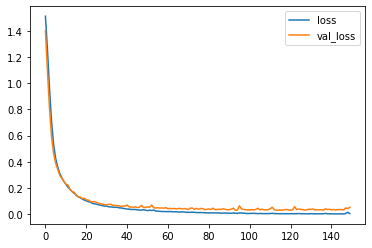

In [39]:
x = list(range(n_epoch))
plt.plot(x, history.history['loss'],label="loss")
plt.plot(x, history.history['val_loss'],label="val_loss")
plt.legend();

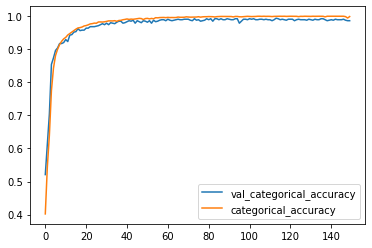

In [40]:
plt.plot(x, history.history['val_categorical_accuracy'],label="val_categorical_accuracy")
plt.plot(x, history.history['categorical_accuracy'],label="categorical_accuracy")
plt.legend();